In [1]:
%load_ext autoreload
%autoreload 2
%cd /home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering

/home/xux/Desktop/Enzyme_design/Savi_design/Savinase-engineering


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from Levenshtein import distance as levenshtein_distance

# Evaluate the distance to Savinase

In [3]:
savinase = 'AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRGGASFVPGEPSTQDGNGHGTHVAGTIAALNNSIGVLGVAPSAELYAVKVLGASGSGSVSSIAQGLEWAGNNGMHVANLSLGSPSPSATLEQAVNSATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGSTNLYGSGLVNAEAATR'

def edit_distance2wildtype(variant_seq, wildtype=savinase):
    try:
        return levenshtein_distance(variant_seq, wildtype)
    except:
        raise Exception(f"variant_seq value error {variant_seq}")

## Baseline 10k training data

In [ ]:
train_path = 'data/round2/prior/target_seqs_train.csv'
train_data = pd.read_csv(train_path)

train = train_data['sequence'].tolist()
train_data['seq_len'] = train_data['sequence'].str.len()
train_data['dist2wt'] = [edit_distance2wildtype(seq) for seq in train_data['sequence']]

train_10k = train_data.sample(10000)

# train_10k.to_csv(train_path + '-10k.csv', index=False)
len(train_10k)

10000

## 10k samples from Prior model

In [5]:
prior_sample_path = 'data/round2/prior/pretrain_10k_samples.txt'

prior_10k = pd.read_csv(prior_sample_path)
prior_10k['seq_len'] = prior_10k['seqs'].str.len()
prior_10k['dist2wt'] = [edit_distance2wildtype(seq)  if not pd.isna(seq) else len(savinase) for seq in prior_10k['seqs']]
len(prior_10k)

9998

## 10k samples from finetuned Prior model

In [6]:
ft_prior_sample_path = 'data/round2/prior/finetune_10k_samples.txt'

ft_prior_10k = pd.read_csv(ft_prior_sample_path)
ft_prior_10k['seq_len'] = ft_prior_10k['seqs'].str.len()
ft_prior_10k['dist2wt'] = [edit_distance2wildtype(seq)  if not pd.isna(seq) else len(savinase) for seq in ft_prior_10k['seqs']]
len(ft_prior_10k)

8686

In [7]:
def show_min_max(prop):
    min_max = [train_10k[prop].values.min(),train_10k[prop].values.max(), \
               prior_10k[prop].values.min(),prior_10k[prop].values.max(), \
               ft_prior_10k[prop].values.min(),ft_prior_10k[prop].values.max()]
    print(f"{prop}: min = {min(min_max)}, max = {max(min_max)}")

    print(f"final {prop}: mean = {ft_prior_10k[prop].mean()}, median = {ft_prior_10k[prop].median()}")

show_min_max('dist2wt')

dist2wt: min = 1, max = 370
final dist2wt: mean = 20.89431268708266, median = 12.0


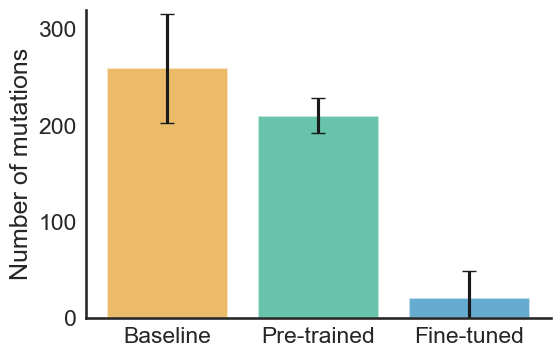

In [9]:
from utils import plot_style_utils

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

prop = 'dist2wt'
ylabel = 'Number of mutations'

# show the mean and std of the distributions
train_mean = train_10k[prop].mean()
train_std = train_10k[prop].std()
prior_mean = prior_10k[prop].mean()
prior_std = prior_10k[prop].std()
BPN_prior_mean = ft_prior_10k[prop].mean()
BPN_prior_std = ft_prior_10k[prop].std()

# plot a bar plot to compare the mumber of mutations
ax.bar([1, 2, 3], [train_mean, prior_mean, BPN_prior_mean], 
       yerr=[train_std, prior_std, BPN_prior_std],
       color=[plot_style_utils.CAT_PALETTE[1], plot_style_utils.CAT_PALETTE[2], plot_style_utils.CAT_PALETTE[0]],
       alpha=0.6, capsize=5)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Baseline', 'Pre-trained', 'Fine-tuned'])
ax.set_ylabel(ylabel)

ax.set_ylim([0, 320])
plot_style_utils.save_for_pub(fig=fig, path="figures/round2/prior_dist2wt_barplot")